In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [ ]:
train = pd.read_csv('SalaryData_Train.csv')

In [ ]:
upload = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [ ]:
test = pd.read_csv('SalaryData_Test.csv')

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
Train =train.drop_duplicates()

In [ ]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
Test=test.drop_duplicates()

In [ ]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
Test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
Train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [ ]:
Test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [ ]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


In [ ]:
pd.crosstab(Test['occupation'],Test['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1451,252
Armed-Forces,2,3
Craft-repair,1338,391
Exec-managerial,1022,875
Farming-fishing,427,57
Handlers-cleaners,597,51
Machine-op-inspct,801,112
Other-service,1449,64
Priv-house-serv,87,2


In [ ]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


In [ ]:
pd.crosstab(Test['workclass'],Test['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,278,182
Local-gov,721,296
Private,7932,2206
Self-emp-inc,259,306
Self-emp-not-inc,937,342
State-gov,488,176
Without-pay,5,2


## Data Visualisation

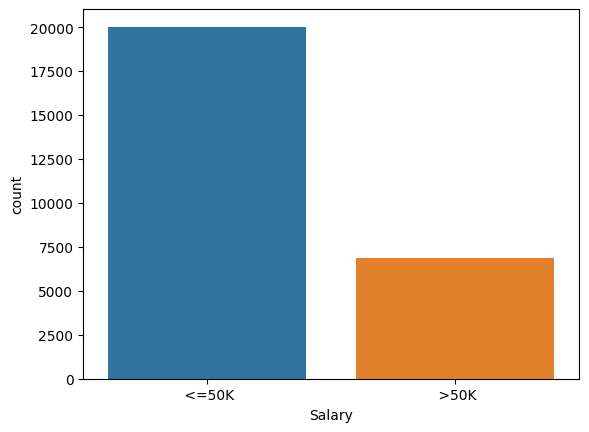

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [ ]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

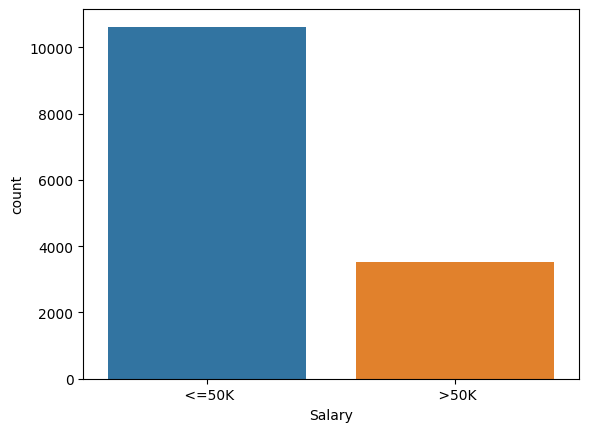

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [ ]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

<Axes: xlabel='education'>

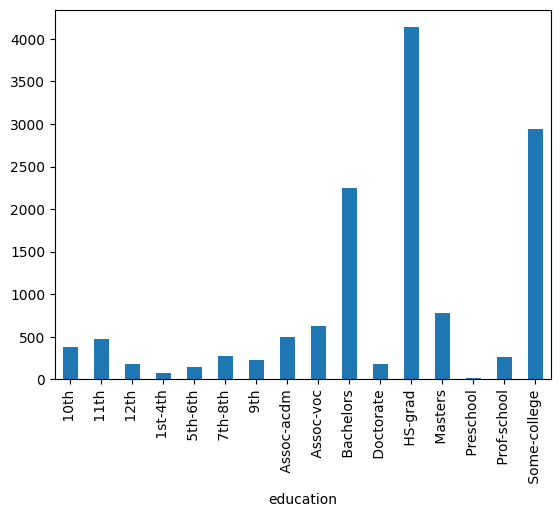

In [ ]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<Axes: xlabel='education'>

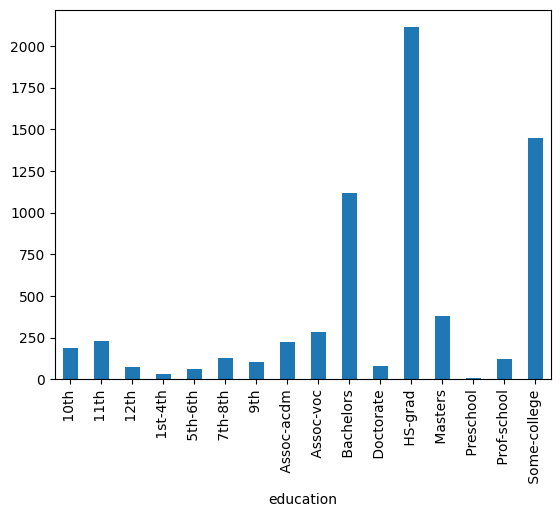

In [ ]:
pd.crosstab(Test['Salary'],Train['education']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

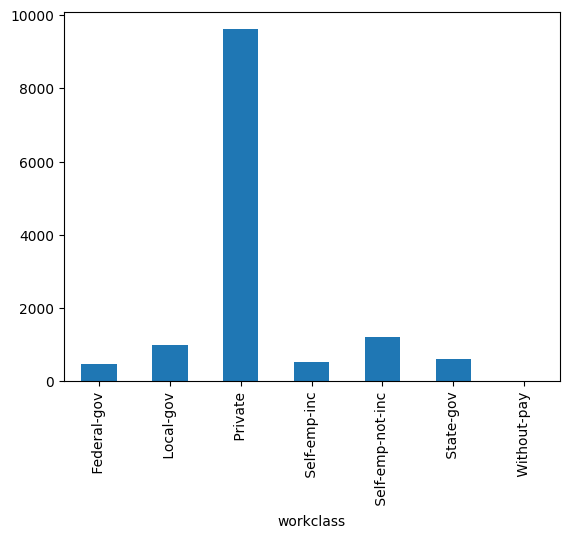

In [ ]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

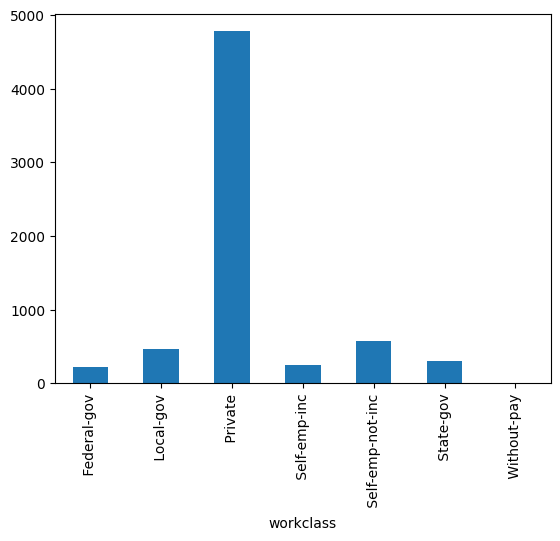

In [ ]:
pd.crosstab(Test['Salary'],Train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

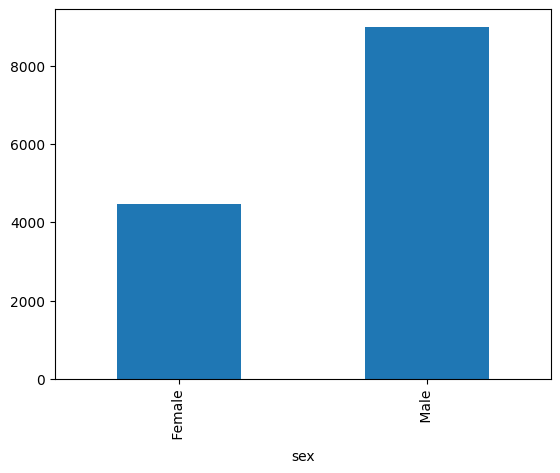

In [ ]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

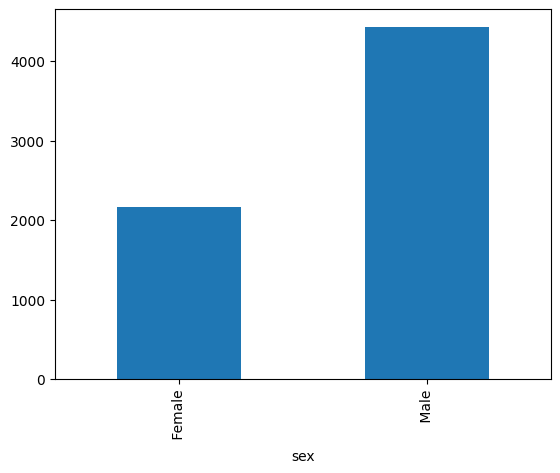

In [ ]:
pd.crosstab(Test['Salary'],Train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

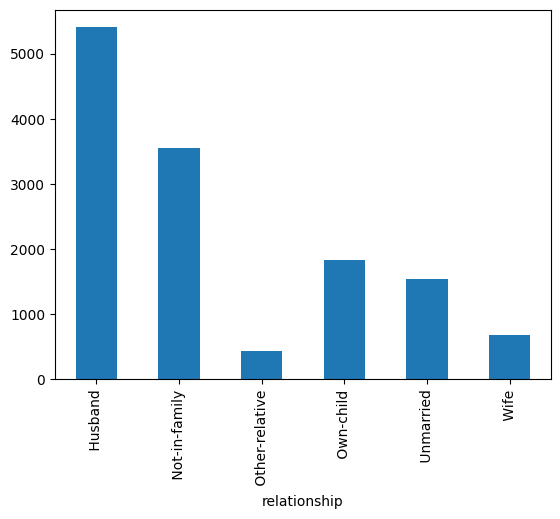

In [ ]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

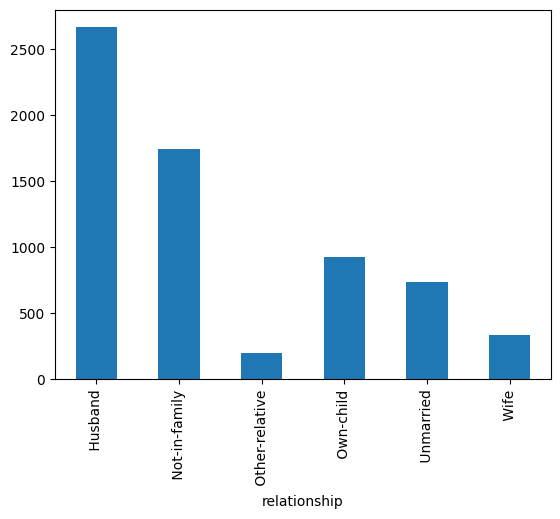

In [ ]:
pd.crosstab(Test['Salary'],Train['relationship']).mean().plot(kind='bar')

In [ ]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [ ]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [ ]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [ ]:
Test.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K
15059,35,3,9,13,2,3,0,4,1,0,0,60,37,>50K


In [ ]:
traincolnames = Train.columns
traincolnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
testcolnames = test.columns
testcolnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
Train['maritalstatus'].value_counts()

2    12371
4     8387
0     4009
5      928
6      817
3      370
1       21
Name: maritalstatus, dtype: int64

In [ ]:
Test['maritalstatus'].value_counts()

2    6490
4    4501
0    2026
5     470
6     450
3     182
1      11
Name: maritalstatus, dtype: int64

In [ ]:
x_train = Train[traincolnames[0:13]].values
y_train = Train[traincolnames[13]].values
x_test = Test[testcolnames[0:13]].values
y_test = Test[testcolnames[13]].values

In [ ]:
#Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]])

In [ ]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]])

In [ ]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

## APPLYING NAVIE BAYES FOR CLASSIFICATION

In [ ]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
M_model=MB()

train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

In [ ]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi

0.7442664386871353

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, test_pred_multi)
confusion_matrix

array([[10620,     0],
       [ 3510,     0]])

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

0.7515923566878981


## Gaussian Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [ ]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau

0.7933687692822362

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)
confusion_matrix

array([[10056,   564],
       [ 2330,  1180]])

In [ ]:
#Accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.7951875442321302
